In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
%matplotlib inline

In [2]:
# read
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])
# select top10 countries excluding china and italy
countries = ['US', 'Spain', 'Italy', 'France', 'Germany', 'United Kingdom', 'China', 'Iran', 'Turkey', 'Belgium']
df = df[df['Country'].isin(countries)]
# sum up everything into 'cases'
df['Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)

In [3]:
# transform index to date, columns to countires, and take remaining values from cases
df = df.pivot(index='Date', columns='Country', values='Cases')
countries = list(df.columns)
covid = df.reset_index('Date') # create new df
covid.set_index(['Date'], inplace=True) # set index
covid.columns = countries # set columns

In [4]:
# specify population of each country
populations = {'US': 330548815,'Italy': 60480150, 'China': 1438161793, 'Spain': 46750928, 'France': 65239883, 'Germany': 83721496, 'United Kingdom': 67802690, 'Iran': 83756900, 'Turkey': 84140859, 'Belgium': 11578789}
percapita = covid.copy()
# divide each country by its population and multiply by 100 000 in order to get cases per 100 000 citizens
for country in list(percapita.columns):
    percapita[country] = percapita[country]/populations[country]*100000

Text(2020-01-23 00:00:00, 696265, 'For: USA, Spain, France, China, Italy, Germany, United Kingdom, Iran, Turkey and Belgium\n# of Cases = Confirmed + Recovered + Deaths')

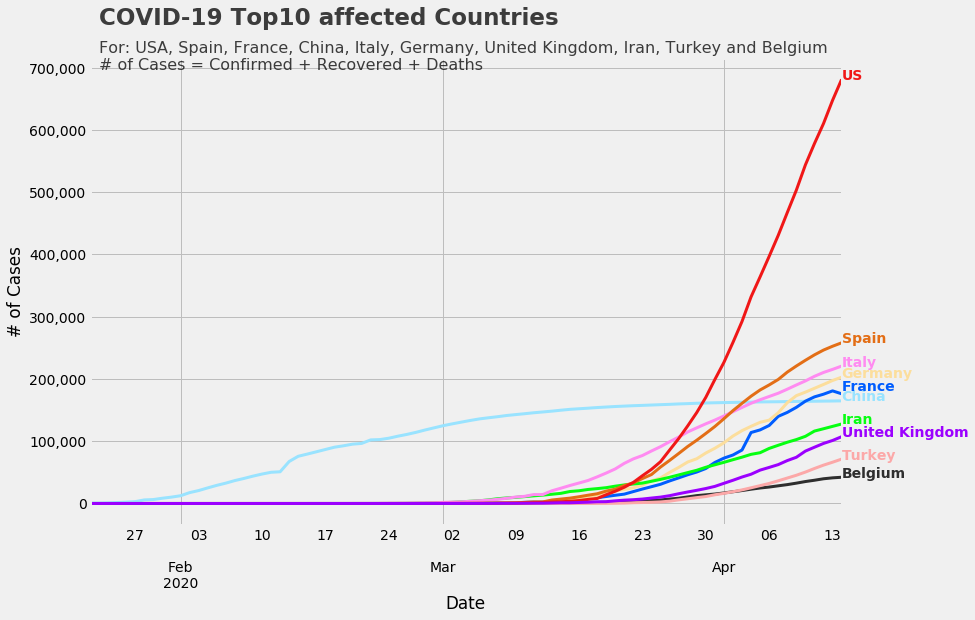

In [5]:
#picking colors and style - hardest part: 10 countries and like 6 colors?
colors = {'Belgium':'#2E2E2E', 'China':'#99E3FF', 'France':'#005DFF', 'Germany':'#FCDE9C','Iran':'#06FF11', 'Italy':'#FF8BF1', 'Spain':'#E36E16', 'Turkey':'#FCA8A8', 'US':'#F01717', 'United Kingdom':'#9B00FF'}
plt.style.use('fivethirtyeight')

plot = covid.plot(figsize=(12,8), color=list(colors.values()), linewidth=3, legend=False) # plot
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}')) # set seperator for thousands
plot.grid(color='#BDBDBD') # color of grid lines
plot.set_xlabel('Date') # x label
plot.set_ylabel('# of Cases') # y label

# assign previously set colors, and set label text for countires
for country in list(colors.keys()):
    plot.text(x = covid.index[-1], y = covid[country].max(), color = colors[country], s = country, weight = 'bold')

# final labels
plot.text(x = covid.index[1], y = int(covid.max().max())+45000, s = "COVID-19 Top10 affected Countries\n", fontsize = 23, weight = 'bold', alpha = .75)
plot.text(x = covid.index[1], y = int(covid.max().max())+15000, s = "For: USA, Spain, France, China, Italy, Germany, United Kingdom, Iran, Turkey and Belgium\n# of Cases = Confirmed + Recovered + Deaths", fontsize = 16, alpha = .75)

In [6]:
covid_nous = covid.drop(['US'], axis=1)

Text(2020-01-23 00:00:00, 273101, 'Excluding USA to preserve scale\n# of Cases = Confirmed + Recovered + Deaths')

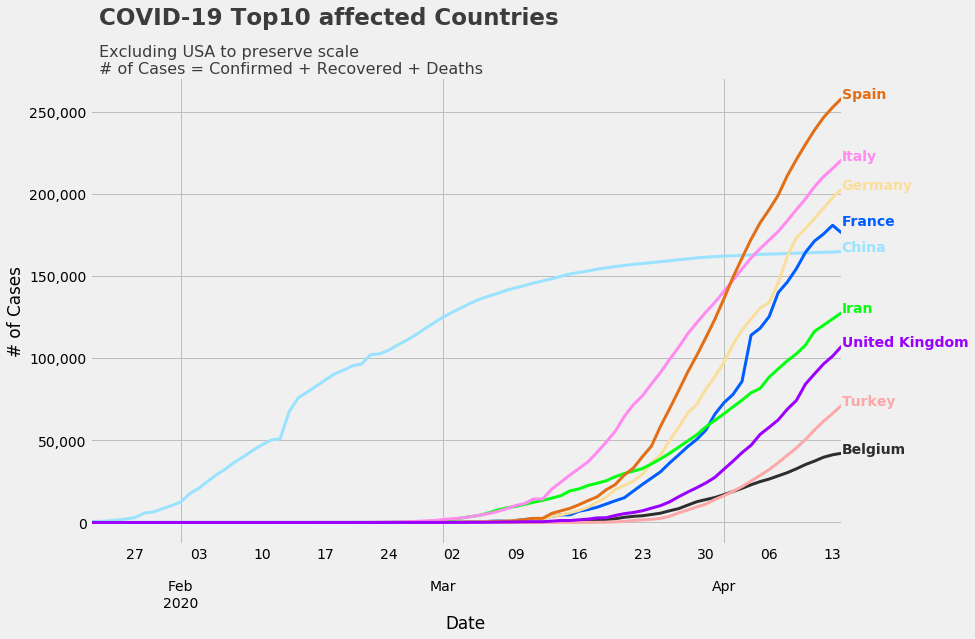

In [7]:
#picking colors and style - hardest part: 10 countries and like 6 colors?
colors2 = {'Belgium':'#2E2E2E', 'China':'#99E3FF', 'France':'#005DFF', 'Germany':'#FCDE9C','Iran':'#06FF11', 'Italy':'#FF8BF1', 'Spain':'#E36E16', 'Turkey':'#FCA8A8', 'United Kingdom':'#9B00FF'}
plt.style.use('fivethirtyeight')

plot = covid_nous.plot(figsize=(12,8), color=list(colors2.values()), linewidth=3, legend=False) # plot
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}')) # set seperator for thousands
plot.grid(color='#BDBDBD') # color of grid lines
plot.set_xlabel('Date') # x label
plot.set_ylabel('# of Cases') # y label

# assign previously set colors, and set label text for countires
for country in list(colors2.keys()):
    plot.text(x = covid.index[-1], y = covid[country].max(), color = colors2[country], s = country, weight = 'bold')

# final labels
plot.text(x = covid_nous.index[1], y = int(covid_nous.max().max())+45000, s = "COVID-19 Top10 affected Countries", fontsize = 23, weight = 'bold', alpha = .75)
plot.text(x = covid_nous.index[1], y = int(covid_nous.max().max())+15000, s = "Excluding USA to preserve scale\n# of Cases = Confirmed + Recovered + Deaths", fontsize = 16, alpha = .75)

Text(2020-01-23 00:00:00, 562.0767416638232, 'For: USA, Spain, China, Italy, France, Germany, United Kingdom, Iran, Turkey and Belgium\n# of Cases = Confirmed + Recovered + Deaths')

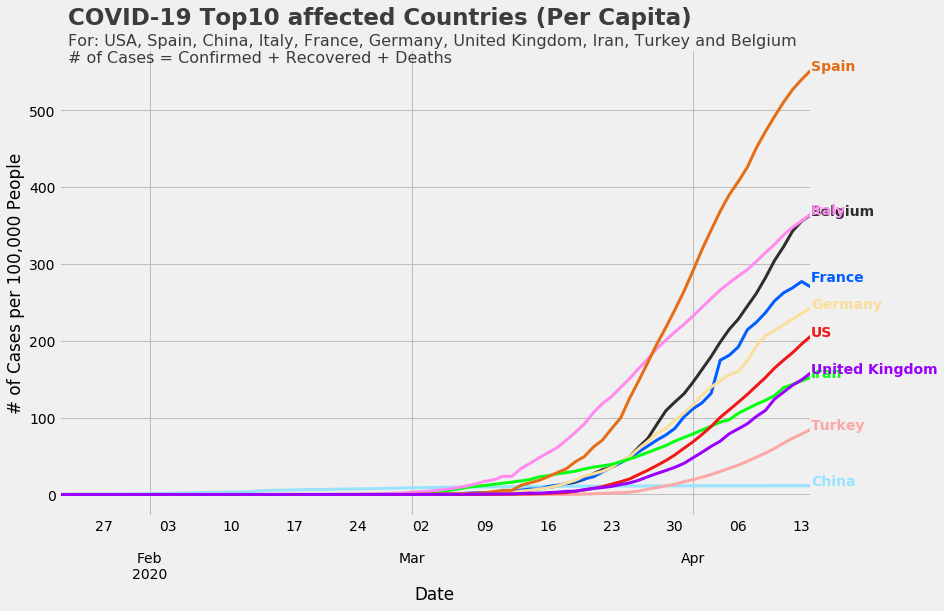

In [8]:
percapitaplot = percapita.plot(figsize=(12,8), color=list(colors.values()), linewidth=3, legend=False)
percapitaplot.grid(color='#BDBDBD')
percapitaplot.set_xlabel('Date')
percapitaplot.set_ylabel('# of Cases per 100,000 People')
for country in list(colors.keys()):
    percapitaplot.text(x = percapita.index[-1], y = percapita[country].max(), color = colors[country], s = country, weight = 'bold')
percapitaplot.text(x = percapita.index[1], y = percapita.max().max()+25, s = "COVID-19 Top10 affected Countries (Per Capita)\n", fontsize = 23, weight = 'bold', alpha = .75)
percapitaplot.text(x = percapita.index[1], y = percapita.max().max()+10, s = "For: USA, Spain, China, Italy, France, Germany, United Kingdom, Iran, Turkey and Belgium\n# of Cases = Confirmed + Recovered + Deaths", fontsize = 16, alpha = .75)